In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.optimize import leastsq,curve_fit
import pickle
from scipy import stats
from scipy.integrate import quad
import scipy as sp
import glob

#b100
data: mean=0.0118,med=0.0075
turb_div_B: mean=0.0103,med=0.0036
bh_div_B: mean=0.0363,med=0.0044
w_div_B: mean=0.0269,med=0.0153
par_div_B, mean coeffs: mean=0.0375,med=0.0117
par_div_B, med coeffs: mean=0.0213,med=0.0066
perp_div_B, mean coeffs: mean=0.0196,med=0.0115
perp_div_B, med coeffs: mean=0.0101,med=0.0062
default perp_div_B: mean=0.0252,med=0.0082
default par_div_B: mean=0.0164,med=0.0052
#b10
data: mean=0.0139,med=0.0088
turb_div_B: mean=0.0101,med=0.0044
bh_div_B: mean=0.0333,med=0.0060
w_div_B: mean=0.0247,med=0.0136
par_div_B, mean coeffs: mean=0.0243,med=0.0085
par_div_B, med coeffs: mean=0.0145,med=0.0048
perp_div_B, mean coeffs: mean=0.0122,med=0.0076
perp_div_B, med coeffs: mean=0.0068,med=0.0043
default perp_div_B: mean=0.0198,med=0.0089
default par_div_B: mean=0.0106,med=0.0036
#b1
data: mean=0.0079,med=0.0042
turb_div_B: mean=0.0094,med=0.0034
bh_div_B: mean=0.0364,med=0.0051
w_div_B: mean=0.0205,med=0.0090
par_div_B, mean coeffs: mean=0.0131,med=0.0051
par_div_B, med coeffs: mean=0.0087,med=0.0031
perp_div_B, mean coeffs: mean=0.0069,med=0.0047
perp_div_B, med coeffs: mean=0.0043,med=0.0028
default perp_div_B: mean=0.0130,med=0.0072
default par_div_B: mean=0.0060,med=0.0022
#b0.1
data: mean=0.0056,med=0.0034
turb_div_B: mean=0.0093,med=0.0049
bh_div_B: mean=0.0373,med=0.0068
w_div_B: mean=0.0204,med=0.0121
par_div_B, mean coeffs: mean=0.0094,med=0.0040
par_div_B, med coeffs: mean=0.0068,med=0.0025
perp_div_B, mean coeffs: mean=0.0051,med=0.0037
perp_div_B, med coeffs: mean=0.0035,med=0.0024
default perp_div_B: mean=0.0108,med=0.0071
default par_div_B: mean=0.0045,med=0.0018
#b0.01
data: mean=0.0013,med=0.0010
turb_div_B: mean=0.0096,med=0.0070
bh_div_B: mean=0.0301,med=0.0097
w_div_B: mean=0.0241,med=0.0173
par_div_B, mean coeffs: mean=0.0034,med=0.0018
par_div_B, med coeffs: mean=0.0029,med=0.0014
perp_div_B, mean coeffs: mean=0.0021,med=0.0018
perp_div_B, med coeffs: mean=0.0018,med=0.0014
default perp_div_B: mean=0.0052,med=0.0043
default par_div_B: mean=0.0018,med=0.0009

In [32]:
# mu=np.zeros(5)-1
mu2=np.zeros(5)-1
sig=mu.copy()
#
beta= np.array(['0.01','0.1','1','10','100'])
for cnt,b in enumerate(beta):
    fin=open("beta_%s_indivSteadyMdots.pickle" % b,'r')
    a=pickle.load(fin)
    fin.close()
#     mu[cnt]= np.mean(np.log(a))
    mu2[cnt]= np.log(np.median(a))
    sig[cnt]=np.std(np.log(a))
va_rms=np.array([14.18,5.15,3.52,2.12,1.10])
beta_rms= 2/va_rms**2
# glob.glob("beta_*_indivSteadyMdots.pickle")

print beta_rms


[ 0.00994667  0.07540767  0.16141529  0.44499822  1.65289256]


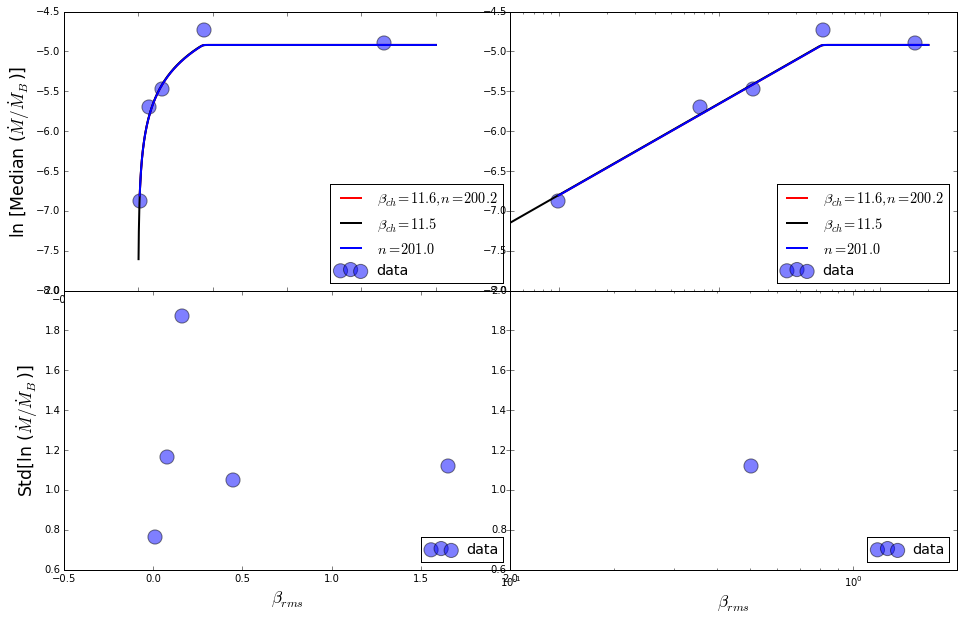

In [58]:
def lee_mach_bh(rmsV,cs):
    lam=np.exp(1.5)/4
    return np.power( 1.+np.power(rmsV/cs,4), 1./3)/np.power( 1.+np.power(rmsV/cs/lam,2), 1./6)

def lee_parallel(x,beta_ch,n):
    beta=x.copy()
    rmsV=5.
    cs=1.
    mach_bh= lee_mach_bh(rmsV,cs)
    return np.log( mach_bh**-2*np.power(mach_bh**n+np.power(beta_ch/beta,n/2.), -1./n) )

def lee_parallel_neq100(x,beta_ch):
    beta=x.copy()
    n=100.
    rmsV=5.
    cs=1.
    mach_bh= lee_mach_bh(rmsV,cs)
    return np.log( mach_bh**-2*np.power(mach_bh**n+np.power(beta_ch/beta,n/2.), -1./n) )

def lee_parallel_betachEq11(x,n):
    beta=x.copy()
    beta_ch=11.6
    rmsV=5.
    cs=1.
    mach_bh= lee_mach_bh(rmsV,cs)
    return np.log( mach_bh**-2*np.power(mach_bh**n+np.power(beta_ch/beta,n/2.), -1./n) )

fig,axes=plt.subplots(2,2)
fig.set_size_inches(16, 10)
plt.subplots_adjust(hspace=0,wspace=0)
ax=axes.flatten()
colors=['k','b','g','r','c','m','y'] +['#33CCFF']
#pts to fit to
area=200
for i in [0,1]:
    ax[i].scatter(beta_rms,mu2,s=area,c='b',marker='o',alpha=0.5,label=r'data')
    p0 = [19.8,1]
    opt, pcov = curve_fit(lee_parallel,beta_rms,mu2,p0=p0)
    beta_cont= np.linspace(0,2,num=1000)
    lab=r'$\beta_{ch}= %.1f, n = %.1f$' % (opt[0],opt[1])
    ax[i].plot(beta_cont,lee_parallel(beta_cont,opt[0],opt[1]),'r-',lw=2,label=lab)
    p0 = [19.8]
    opt, pcov = curve_fit(lee_parallel_neq100,beta_rms,mu2,p0=p0)
    lab=r'$\beta_{ch}= %.1f$' % (opt[0])
    ax[i].plot(beta_cont,lee_parallel_neq100(beta_cont,opt[0]),'k-',lw=2,label=lab)
    p0 = [10.]
    opt, pcov = curve_fit(lee_parallel_betachEq11,beta_rms,mu2,p0=p0)
    lab=r'$n= %.1f$' % (opt[0])
    ax[i].plot(beta_cont,lee_parallel_betachEq11(beta_cont,opt[0]),'b-',lw=2,label=lab)
ax[2].scatter(beta_rms,sig,s=area,c='b',marker='o',alpha=0.5,label=r'data')
ax[3].scatter(np.log(beta_rms),sig,s=area,c='b',marker='o',alpha=0.5,label=r'data')
ax[0].set_ylabel(r'ln [Median ($\dot{M}/\dot{M}_B$)]',fontsize='xx-large')
ax[2].set_ylabel(r'Std[ln ($\dot{M}/\dot{M}_B$)]',fontsize='xx-large')
for i in [2,3]: ax[i].set_xlabel(r'$\beta_{rms}$',fontsize='xx-large')
for i in [1,3]: 
    ax[i].set_xscale('log')
ax[1].set_xlim(5e-3,3)
ax[3].set_xlim(1e-1,2)
for i in range(4): ax[i].legend(loc=4,fontsize='x-large')
#fit ln(median)

#panel 1
# ax[0].set_xscale('log')





In [34]:
plt.scatter?

(0, 0.3)

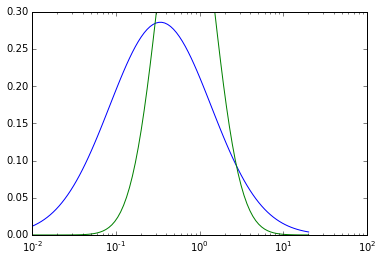

In [42]:
def dp_dlnM(lnM,med,mean):
    std=(2*np.log(mean/med))**0.5
    return (2*np.pi*std**2)**-0.5*np.exp(-(lnM-np.log(med))**2/2/std**2)
M=np.exp(np.linspace(-5,3,num=100))
(mean,med)=(0.9,0.34)
plt.plot(M,dp_dlnM(np.log(M),med,mean),c='b')
(mean,med)=(0.9,0.68)
plt.plot(M,dp_dlnM(np.log(M),med,mean),c='g')
plt.xscale('log')
plt.xlim(1e-2,1e2)
plt.ylim(0,0.3)

(0, 0.8)

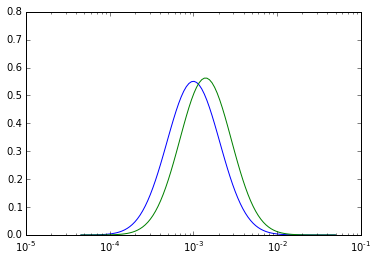

In [17]:
#b0.01
M=np.exp(np.linspace(-10,-3,num=100))
mean,med=(0.0013,0.0010)
plt.plot(M,dp_dlnM(np.log(M),med,mean),c='b') #'data prediction')
mean,med=(0.0018,0.0014)
plt.plot(M,dp_dlnM(np.log(M),med,mean),c='g') #'closest prediction')
plt.xscale('log')
plt.xlim(1e-5,1e-1)
plt.ylim(0,0.8)

In [68]:
class Obj():
    pass
fin=open('b0.01/final_distributions.pickle','r')
(logbins,loghists,databins,datahist)=pickle.load(fin)
fin.close()

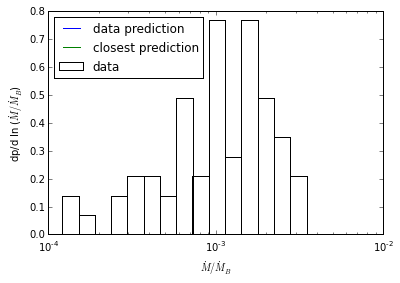

In [69]:
def add_to_plot(ax,logbins,loghist,c,ls,label):
    bins=(logbins[:-1]+logbins[1:])/2
    bins=np.exp(bins)
    ax.plot(bins,loghist,c=c,ls=ls,label=label)
  
fig,ax=plt.subplots(1,1)
# add_to_plot(ax, logbins.bh,loghists.bh,'g','-','bh')
# add_to_plot(ax, logbins.w,loghists.w,'m','-','w')
# add_to_plot(ax, logbins.par_mean_pars,loghists.par_mean_pars,'b','-',r'$\parallel$ mean pars')
# add_to_plot(ax, logbins.par_med_pars,loghists.par_med_pars,'b','--',r'$\parallel$ median pars')
# add_to_plot(ax, logbins.perp_mean_pars,loghists.perp_mean_pars,'y','-',r'$\perp$ mean pars')
# add_to_plot(ax, logbins.perp_med_pars,loghists.perp_med_pars,'y','--',r'$\perp$ median pars')
# add_to_plot(ax, logbins.perp_default,loghists.perp_default,'r','-',r'$\perp$ default')
# add_to_plot(ax, logbins.par_default,loghists.par_default,'r','--',r'$\parallel$ default')
bins=(databins[:-1]+databins[1:])/2
bins=np.exp(bins)
left=np.exp(databins[:-1])
right=np.exp(databins[1:])
ax.bar(bins,datahist,width=right-left,align='center',fill=False,color='k',label='data')
#plt.xlim([1e-2,1e2])
#plt.ylim([0,0.5])
#     plt.yscale('log')
def k_normal(x,mu,std):
    return (2*np.pi*std**2)**-0.5*np.exp(-(x-mu)**2/2/std**2)

def mdot_pdf(ln_mdot,mean,med):
    mu,std= np.log(med),np.sqrt(2*np.log(mean/med))
    return k_normal(ln_mdot,mu,std)

(mu,sigma)=(5,1)
M=np.exp(np.linspace(-10,-3,num=100))
mean,med=(0.0013,0.0010)
plt.plot(M,mdot_pdf(np.log(M),med,mean),c='b',label='data prediction')
mean,med=(0.0018,0.0014)
plt.plot(M,mdot_pdf(np.log(M),med,mean),c='g',label='closest prediction')

ax.set_xscale('log')
ax.set_xlabel(r'$\dot{M}/\dot{M}_{0}$')
ax.set_ylabel(r'dp/d ln ($\dot{M}/\dot{M}_{0}$)')
ax.legend(loc=0)




In [222]:
class Obj():
    pass
fin=open('b0.01/data_models_CDFs.pickle','r')
(model_bins,model_cdfs,data_bins,data_cdf)=pickle.load(fin)
fin.close()

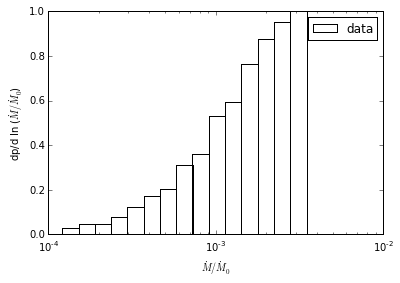

In [225]:
fig,ax=plt.subplots(1,1)
bins=(data_bins[:-1]+data_bins[1:])/2
bins=np.exp(bins)
left=np.exp(databins[:-1])
right=np.exp(databins[1:])
plt.bar(bins,data_cdf,width=right-left,align='center',fill=False,color='k',label='data')
ax.set_xscale('log')
ax.set_xlabel(r'$\dot{M}/\dot{M}_{0}$')
ax.set_ylabel(r'dp/d ln ($\dot{M}/\dot{M}_{0}$)')
ax.legend(loc=0)

type(eval_cdf_at)=  <type 'numpy.ndarray'> [-8.78934716 -8.56544012 -8.34153308 -8.11762604 -7.893719   -7.66981196
 -7.44590492 -7.22199788 -6.99809083 -6.77418379 -6.55027675 -6.32636971
 -6.10246267 -5.87855563 -5.65464859]
x=  [-8.78934716 -8.56544012 -8.34153308 -8.11762604 -7.893719   -7.66981196
 -7.44590492 -7.22199788 -6.99809083 -6.77418379 -6.55027675 -6.32636971
 -6.10246267 -5.87855563 -5.65464859]
data,model,|diff|=  0.03125 0.000878198710189 0.0303718012898
data,model,|diff|=  0.046875 0.00245576753893 0.0444192324611
data,model,|diff|=  0.046875 0.00626322355292 0.0406117764471
data,model,|diff|=  0.078125 0.0145867951643 0.0635382048357
data,model,|diff|=  0.125 0.0310690058941 0.0939309941059
data,model,|diff|=  0.171875 0.0606324128827 0.111242587117
data,model,|diff|=  0.203125 0.108664207886 0.0944607921136
data,model,|diff|=  0.3125 0.179351309475 0.133148690525
data,model,|diff|=  0.359375 0.273581468343 0.085793531657
data,model,|diff|=  0.53125 0.387364915616 0

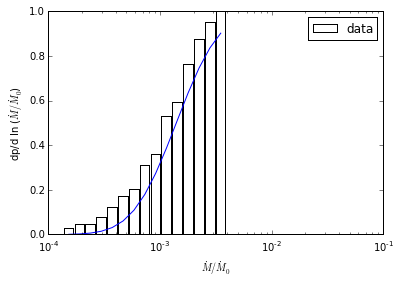

In [257]:
def mdot_model_pdf(lnM,med,mean):
#     lnM=lnM/1.05
    std=(2*np.log(mean/med))**0.5
    return (2*np.pi*std**2)**-0.5*np.exp(-(lnM-np.log(med))**2/2/std**2)

def mdot_model_cdf(x,med,mean):
    print "x= ",x
    x_sort=np.sort(x.copy())
    cdf=np.zeros(len(x_sort))-1
#     pdf=cdf.copy()
    for i in range(len(x_sort)):
#         pdf[i]=mdot_model_pdf(x_sort[i],mu,std)
        cdf[i],err= quad(mdot_model_pdf,-sp.inf,x_sort[i],args=(med,mean),epsabs=0,epsrel=1e-6)
    if len(np.where(cdf < 0)[0]) > 0: 
        print "cdf < 0 here: ",np.where(cdf < 0)[0]
        raise ValueError
#     print 'cdf= ',cdf
#     return pdf,cdf
    return cdf

eval_cdf_at= data_bins[1:]
print "type(eval_cdf_at)= ",type(eval_cdf_at),eval_cdf_at
# (mean,med)=(0.0013,0.0010) #directly from data
(mean,med)=(0.0018,0.0014) #predicted
model_cdf=mdot_model_cdf(eval_cdf_at,med,mean)
# plt.bar(bins,data_cdf,width=right-left,align='center',fill=False,color='k',label='data')
plt.bar(np.exp(eval_cdf_at),data_cdf,width=right-left,align='center',fill=False,color='k',label='data')
plt.plot(np.exp(eval_cdf_at),model_cdf,c='b')
plt.xscale('log')
plt.xlim(1e-4,1e-1)
plt.xlabel(r'$\dot{M}/\dot{M}_{0}$')
plt.ylabel(r'dp/d ln ($\dot{M}/\dot{M}_{0}$)')
plt.legend(loc=0)
for d,m in zip(data_cdf,model_cdf): print "data,model,|diff|= ",d,m,np.abs(d-m)
D=my_ks_test(data_cdf,model_cdf,N=64)
print "KS statistic= ",D

In [35]:
def normalize(x,y):
    coeff= 1./np.trapz(y=y,x=x)
    return coeff*y
norm=normalize(np.log(M),dp_dlnM(np.log(M),med,mean))
np.trapz(-np.log(M),dp_dlnM(np.log(M),med,mean))

0.99995737779243177

In [ ]:
dp_dlnM(lnM,med,mean):
    std=(2*np.log(mean/med))**0.5
    return (2*np.pi*std**2)**-0.5*np.exp(-(lnM-np.log(med))**2/2/std**2)
M=np.exp(np.linspace(-5,3,num=100))
(mean,med)=(0.9,0.34)
plt.plot(M,dp_dlnM(np.log(M),med,mean),c='b')

In [9]:
# def dp_dlnM(lnM,med,mean):
#     std=(2*np.log(mean/med))**0.5
#     return (2*np.pi*std**2)**-0.5*np.exp(-(lnM-np.log(med))**2/2/std**2)
# M=np.exp(np.linspace(-5,3,num=100))
# (mean,med)=(0.9,0.34)
# plt.plot(M,dp_dlnM(np.log(M),med,mean),c='b')

# lognorm.pdf(x, s, loc, scale) 
# stats.lognorm.pdf(np.arange(0,100),loc=1,scale=1)
s = 0.954
mean, var, skew, kurt = stats.lognorm.stats(s, moments='mvsk')

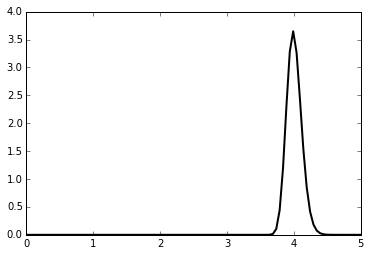

In [37]:
# np.random.seed(987654321)
rv = stats.lognorm(0.11,loc=3) #scale=1)
x=np.linspace(0,5,num=100)
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [40]:
print stats.lognorm.stats(0.11,scale=3,loc=3, moments='mvsk') #mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')

(array(6.018205014640233), array(0.11089525757289526), array(0.3323439170846433), array(0.19700977665365826))


In [43]:
stats.lognorm.pdf?

(0.10687209550167916, 0.049000000000000016)

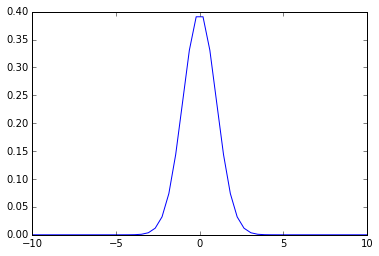

In [55]:
x=np.linspace(-10,10)
plt.plot(x,stats.norm.pdf(x))
stats.norm.pdf(x).std(),stats.norm.pdf(x).mean()

In [56]:
np.trapz?

In [65]:
np.

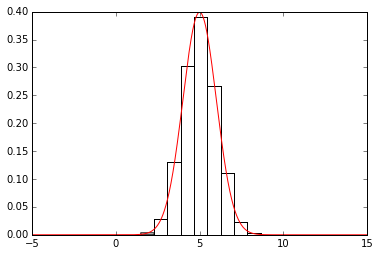

In [96]:


def normal_pdf(x,mu,std):
    return (2*np.pi*std**2)**-0.5*np.exp(-(x-mu)**2/2/std**2)
def normal_cdf(x,mu,std):
#     quad(integrand, sp.inf, 1, args=(a,b))
    integral, error= quad(normal_pdf,-sp.inf,x,args=(mu,std),epsabs=0,epsrel=1e-3)
    return integral

(mu,sigma)=(5,1)
plt.hist(np.random.normal(mu, sigma, 10000),fill=False,normed=True)
x=np.linspace(-5,15,num=1000)
plt.plot(x,normal_pdf(x,mu,sigma),c='r')

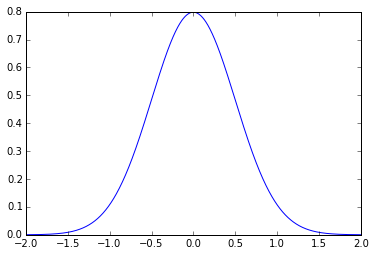

In [161]:
mu,std=0,0.5
x=np.linspace(-2,2,num=1000)
plt.plot(x,ks_normal_pdf(x,mu,std))

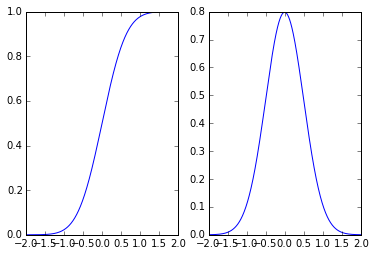

In [162]:
fig,axes=plt.subplots(1,2)
ax=axes.flatten()
pdf,cdf=ks_normal_cdf(x,mu,sigma)
ax[0].plot(x,cdf)
# ax[0].set_xlim(-3,3)
ax[1].plot(x,pdf)

In [160]:
pdf2=pdf.copy()
np.random.shuffle(pdf2)
# plt.hist(pdf2)
pdf2.min(),pdf2.max()


(1.538919725341284e-22, 0.79784458766786515)

In [238]:
def normal_pdf(x,mu,std):
    return (2*np.pi*std**2)**-0.5*np.exp(-(x-mu)**2/2/std**2)

def normal_cdf(x,mu,std):
#     print x,type(x),x.shape
    x_sort=np.sort(x.copy())
    cdf=np.zeros(len(x_sort))-1
    pdf=cdf.copy()
    for i in range(len(x_sort)):
        pdf[i]=normal_pdf(x_sort[i],mu,std)
        cdf[i],err= quad(normal_pdf,-sp.inf,x_sort[i],args=(mu,std),epsabs=0,epsrel=1e-6)
    if len(np.where(cdf < 0)[0]) > 0: 
        print "cdf < 0 here: ",np.where(cdf < 0)[0]
        raise ValueError
#     print 'cdf= ',cdf
    return pdf,cdf
#         for cnt,i in enumerate(x): 
#             integral[cnt], error= quad(normal_pdf,-sp.inf,i,args=(mu,std),epsabs=0,epsrel=1e-3)
#     except TypeError:
#         integral, error= quad(normal_pdf,-sp.inf,i,args=(mu,std),epsabs=0,epsrel=1e-3)
#     return integral

def my_ks_test(data_cdf,model_cdf_eval_at_data_pts,N=64):
    '''N: sample size from which data_cdf is made, 64 sinks
    code taken from relevant parts in: scipy.stats.kstest() 
    since that code is needlessly complicated 
    and requires creation of a scipy.stats.rvs() object
    using deafult: alternative="two-sided", mode="approx"'''
    if len(data_cdf) != len(model_cdf_eval_at_data_pts): raise ValueError
    D = np.abs(data_cdf - model_cdf_eval_at_data_pts).max()
    #I use tabulated crical Dn values from: 
    #http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/
    #http://www.real-statistics.com/statistics-tables/kolmogorov-smirnov-table/
#     pval_two = stats.kstwobign.sf(D*np.sqrt(N))
#     if N > 2666 or pval_two > 0.80 - N*0.3/1000.0:
#         return D, stats.kstwobign.sf(D*np.sqrt(N))
#     else:
#         return D, stats.ksone.sf(D,N)*2
    p_levels=np.array([0.01,0.05,0.1,0.15,0.2])
    if N > 50: 
        D_crit= np.array([1.63,1.36,1.22,1.14,1.07])/N**0.5
        print "D_crit= ",D_crit
        print "T/F: H0 can be rejected at the following percent levels"
        for p,tf in zip(p_levels,D > D_crit): print p,'->',tf
    else: 
        print "N<=50, for D_crit see http://www.real-statistics.com/statistics-tables/kolmogorov-smirnov-table/"
        raise ValueError   
    return D
# data=np.random.normal(mu,sigma , 1000)
# stats.kstest(pdf, ks_normal_cdf,(mu,sigma))

mu,std=  0 0.5 data mu,std=  0.0225626679319 0.486853567124
data,model,|diff|=  0.002 0.00385938541635 0.00185938541635
data,model,|diff|=  0.009 0.0104424573453 0.00144245734526
data,model,|diff|=  0.02 0.0252333456154 0.00523334561535
data,model,|diff|=  0.043 0.0545871607382 0.0115871607382
data,model,|diff|=  0.076 0.106044128478 0.0300441284776
data,model,|diff|=  0.17 0.185721877763 0.0157218777632
data,model,|diff|=  0.282 0.294701731139 0.0127017311394
data,model,|diff|=  0.414 0.426367804926 0.0123678049258
data,model,|diff|=  0.55 0.566882387421 0.0168823874209
data,model,|diff|=  0.688 0.699343749893 0.0113437498933
data,model,|diff|=  0.8 0.809644109162 0.00964410916237
data,model,|diff|=  0.905 0.890774436098 0.0142255639016
data,model,|diff|=  0.942 0.943486005467 0.00148600546656
data,model,|diff|=  0.974 0.973737167815 0.000262832185111
data,model,|diff|=  0.988 0.98907230734 0.00107230734011
data,model,|diff|=  0.994 0.995938852571 0.00193885257094
data,model,|diff|=  

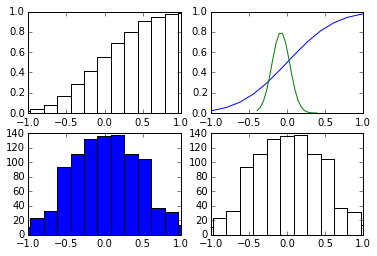

In [221]:
mu,std=0,0.5
fig,axes=plt.subplots(2,2)
ax=axes.flatten()
np.random.seed(140)
N=1000
data=np.random.normal(mu,std , N)
print "mu,std= ",mu,std,"data mu,std= ",data.mean(),data.std()
(data_cdf,bins,junk)= ax[0].hist(data,bins=20,cumulative=True,normed=True,fill=False)
eval_cdf_at= bins[1:] #right side
mid_bins= (bins[1:]+bins[:-1])/2
dx_bins=bins[1:]-bins[:-1]
pdf,model_cdf=normal_cdf(eval_cdf_at,mu,std)
ax[1].plot(eval_cdf_at,model_cdf,midbins,pdf)
(data_pdf,junk1,junk)= ax[2].hist(data,bins=bins)
ax[3].bar(mid_bins,data_pdf,width=dx_bins,align='center',fill=False,color='k',label='data')
for i in range(4): ax[i].set_xlim(-1,1)
for d,m in zip(data_cdf,model_cdf): print "data,model,|diff|= ",d,m,np.abs(d-m)
print bins.min(),bins.max()
D=my_ks_test(data_cdf,model_cdf,N=N)
print "KS statistic= ",D

T/F: H0 can be rejected at the following percent levels
0.01 -> False
0.05 -> False
0.1 -> False
0.15 -> False
0.2 -> False


In [117]:
len(np.where(np.arange(10) < 0)[0])

0

In [126]:
a=np.array([-10,3,-2,4])
print a
print np.sort(a)

[-10   3  -2   4]
[-10  -2   3   4]


In [125]:
class meanObj():
    def __init__(self,mdot,data):
        
        

array([-10,   3,  -2,   4])

# model mean and medians Vs data mean, median

In [113]:
fin=open('b0.01/data_and_phis.pickle','r')
(data,readme,phi_mean,phi_med)= pickle.load(fin)
fin.close()
print readme, data.shape,len(phi_mean),len(phi_med)

['data', 'turb', 'bh', 'w', 'med_reg', 'med_rms', 'mean_reg', 'mean_rms'] (64,) 8 8


if stored manually

MEAN: bh=0.030,w=0.024,combo=0.010,turb=0.019
MEAN: bh=0.037,w=0.020,combo=0.009,turb=0.018
MEAN: bh=0.036,w=0.020,combo=0.009,turb=0.018
MEAN: bh=0.033,w=0.025,combo=0.010,turb=0.020
MEAN: bh=0.036,w=0.027,combo=0.010,turb=0.022
MEDIAN: bh=0.010,w=0.017,combo=0.007,turb=0.008
MEDIAN: bh=0.007,w=0.012,combo=0.005,turb=0.006
MEDIAN: bh=0.005,w=0.009,combo=0.003,turb=0.004
MEDIAN: bh=0.006,w=0.014,combo=0.004,turb=0.006
MEDIAN: bh=0.004,w=0.015,combo=0.004,turb=0.004
data mean/median ratio
b= 0.01 r= 1.2141463477
b= 0.1 r= 1.66445765903
b= 1.0 r= 1.87832645543
b= 10.0 r= 1.5691577948
b= 100.0 r= 1.57606172276
beta=0.01,med=0.00104,pred_med=0.00140,mean=0.00126,pred_mean=0.00286
beta=0.10,med=0.00336,pred_med=0.00325,mean=0.00559,pred_mean=0.00688
beta=1.00,med=0.00418,pred_med=0.00422,mean=0.00786,pred_mean=0.00885
beta=10.00,med=0.00884,pred_med=0.00712,mean=0.01388,pred_mean=0.01486
beta=100.00,med=0.00746,pred_med=0.00885,mean=0.01176,pred_mean=0.01028


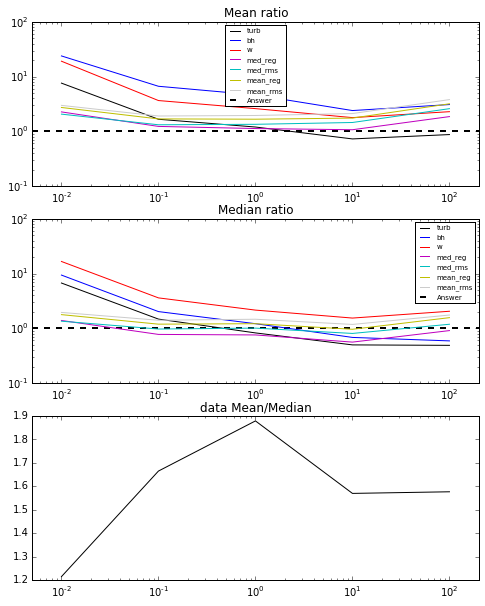

In [6]:
def log_avg(a,b):
    avg= (np.log10(a)+np.log10(b))/2.
    return 10**avg
def mdot_turb(bh,w):
    return np.power(np.power(bh,-2)+np.power(w,-2) ,-0.5)
#answers:
pred_mean=np.zeros(5)-1
pred_med=np.zeros(5)-1
##

fig,axes=plt.subplots(3,1)
ax=axes.flatten()

va_rms=np.array([14.18,5.15,3.52,2.12,1.10])
beta_rms=2/va_rms**2

a={}
for key in ['0.01','0.1','1','10','100']:
    fin=open('b%s/data_and_phis.pickle' % key,'r')
    a[key]=pickle.load(fin)
    fin.close()
#median only
beta=np.zeros(len(a.keys()))-1
data_val=beta.copy()
turb=beta.copy()
bh=beta.copy()
w=beta.copy()
mean_reg=beta.copy()
mean_rms=beta.copy()
med_reg=beta.copy()
med_rms=beta.copy()
#MEAN
for i,key in zip(range(len(beta)),['0.01','0.1','1','10','100']):
    beta[i]= float(key)
    data_val[i]=a[key][2][0]
    turb[i]=a[key][2][1]
    bh[i]=a[key][2][2]
    w[i]=a[key][2][3]
    med_reg[i]=a[key][2][4]
    med_rms[i]=a[key][2][5]
    mean_reg[i]=a[key][2][6]
    mean_rms[i]=a[key][2][7]
# for b,r,t in zip(beta,med_reg,turb):
#     print "MEAN: beta, med_reg, turb= ",b,r,t
ax[0].set_title('Mean ratio')
ax[0].plot(beta,turb/data_val,'k-',label='turb')
ax[0].plot(beta,bh/data_val,'b-',label='bh')
ax[0].plot(beta,w/data_val,'r-',label='w')
ax[0].plot(beta,med_reg/data_val,'m-',label='med_reg')
ax[0].plot(beta,med_rms/data_val,'c-',label='med_rms')
ax[0].plot(beta,mean_reg/data_val,'y-',label='mean_reg')
ax[0].plot(beta,mean_rms/data_val,'0.8',label='mean_rms')
ax[0].hlines(1.,beta.min()/2,beta.max()*2,color='k',linestyle='dashed',lw=2,label='Answer')
pred_mean[:-1]=med_reg[:-1]
pred_mean[-1]=turb[-1]
for turb_x,bh_x,w_x in zip(turb,bh,w):
    print "MEAN: bh=%.3f,w=%.3f,combo=%.3f,turb=%.3f" % (bh_x,w_x,turb_x,mdot_turb(bh_x,w_x))
# ax[0].plot(beta,pred_mean/data_val,'y',label='pred Answer')
#MEDIAN
for i,key in zip(range(len(beta)),['0.01','0.1','1','10','100']):
    beta[i]= float(key)
    data_val[i]=a[key][3][0]
    turb[i]=a[key][3][1]
    bh[i]=a[key][3][2]
    w[i]=a[key][3][3]
    med_reg[i]=a[key][3][4]
    med_rms[i]=a[key][3][5]
    mean_reg[i]=a[key][3][6]
    mean_rms[i]=a[key][3][7]
ax[1].set_title('Median ratio')
ax[1].plot(beta,turb/data_val,'k-',label='turb')
ax[1].plot(beta,bh/data_val,'b-',label='bh')
ax[1].plot(beta,w/data_val,'r-',label='w')
ax[1].plot(beta,med_reg/data_val,'m-',label='med_reg')
ax[1].plot(beta,med_rms/data_val,'c-',label='med_rms')
ax[1].plot(beta,mean_reg/data_val,'y-',label='mean_reg')
ax[1].plot(beta,mean_rms/data_val,'0.8',label='mean_rms')
ax[1].hlines(1.,beta.min()/2,beta.max()*2,color='k',linestyle='dashed',lw=2,label='Answer')
pred_med=med_rms
for turb_x,bh_x,w_x in zip(turb,bh,w):
    print "MEDIAN: bh=%.3f,w=%.3f,combo=%.3f,turb=%.3f" % (bh_x,w_x,turb_x,mdot_turb(bh_x,w_x))
# ax[1].plot(beta,pred_med/data_val,'y',label='pred Answer')
# for b,r in zip(beta,med_rms):
#     print "MEAN: beta, med_rms= ",b,r
#mean/median ratio
data_med=beta.copy()
data_mean=beta.copy()
for i,key in zip(range(len(beta)),['0.01','0.1','1','10','100']):
    data_med[i]=a[key][3][0]
    data_mean[i]=a[key][2][0]
ax[2].set_title('data Mean/Median')
ax[2].plot(beta,data_mean/data_med,'k-')
print "data mean/median ratio"
for b,r in zip(beta,data_mean/data_med): print "b=",b,'r=',r
for i in range(3):
    ax[i].legend(loc=0,fontsize='x-small')
    ax[i].set_xscale('log')
#     ax[i].set_yscale('log')
    ax[i].set_xlim(1e-2/2,1e2*2)
for i in range(2): ax[i].set_yscale('log')
# plt.ylim(8e-4,2e-2)
# plt.title(r'$\phi$ Median')
fig.set_size_inches(8.,10.) 

for b,med,mean,pmed,pmean in zip(beta,data_med,data_mean,pred_med,pred_mean):
    print "beta=%.2f,med=%.5f,pred_med=%.5f,mean=%.5f,pred_mean=%.5f" %\
        (b,med,pmed,mean,pmean)
        


if dict stored

In [8]:
pwd

u'/Users/kburleigh/GradSchool/Research/w_McKee/meeting_prog/10_20_2015'

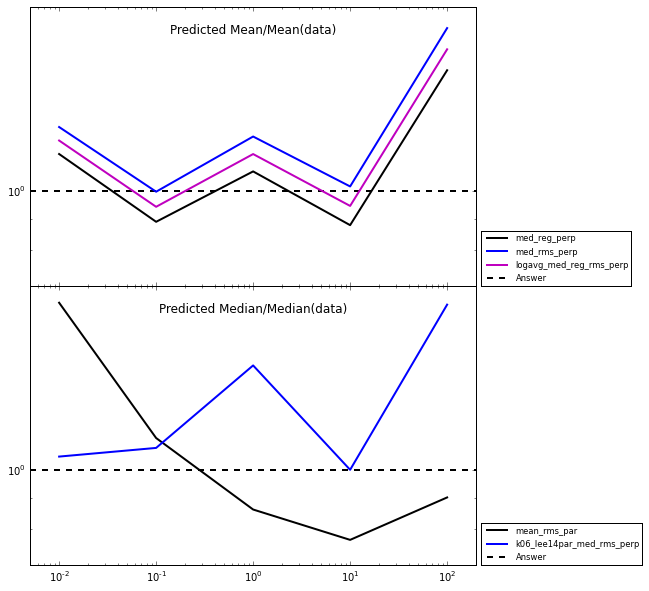

In [152]:
fig,axes=plt.subplots(2,1,sharex=True)
plt.subplots_adjust(hspace=0)
ax=axes.flatten()

#initialize all_beta dict
fin=open('b0.01/data_and_phis.pickle','r')
(data,phi_mean,phi_med)=pickle.load(fin)
fin.close()
allb_phi_mean={}
allb_phi_med={}
allb_phi_mean['beta']=[]
allb_phi_med['beta']=[]
for key in phi_mean.keys(): 
    allb_phi_mean[key]=[]
    allb_phi_med[key]=[]

#get data
for bet in ['0.01','0.1','1','10','100']:
    fin=open('b%s/data_and_phis.pickle' % bet,'r')
    (data,phi_mean,phi_med)=pickle.load(fin)
    fin.close()
    allb_phi_mean['beta'].append(float(bet))
    allb_phi_med['beta'].append(float(bet))
    for key in phi_mean.keys(): 
        allb_phi_mean[key].append( phi_mean[key] )
        allb_phi_med[key].append( phi_med[key] )
#convert to np arrays
for key in allb_phi_mean.keys():
    allb_phi_mean[key]=np.array(allb_phi_mean[key])
    allb_phi_med[key]=np.array(allb_phi_med[key])
include_keys_all_mean=['turb','cunning12','lee14_par','lee14_perp',\
                'mean_reg_par','mean_rms_par','mean_reg_perp','mean_rms_perp']
include_keys_all_med=['turb','cunning12','lee14_par','lee14_perp',\
                'med_reg_par','med_rms_par','med_reg_perp','med_rms_perp']
include_keys_best_mean=['med_reg_perp','med_rms_perp','logavg_med_reg_rms_perp']
include_keys_best_med=['mean_rms_par']
#plot
colors=['k','b','m','r','g','y','c','#00CCFF','#339933','0.8']
#MEAN
cnt=0
# for key in include_keys_all_mean: 
for key in include_keys_best_mean: 
    ax[0].plot(allb_phi_mean['beta'],allb_phi_mean[key]/allb_phi_mean['data'],\
               c=colors[cnt],lw=2,label=key)
    cnt+=1
ax[0].hlines(1.,allb_phi_mean['beta'].min()/2,allb_phi_mean['beta'].max()*2,color='k',linestyle='dashed',lw=2,label='Answer')
#MEDIAN
cnt=0
# for key in include_keys_all_med: 
for key in include_keys_best_med: 
    ax[1].plot(allb_phi_med['beta'],allb_phi_med[key]/allb_phi_med['data'],\
               c=colors[cnt],lw=2,label=key)
    cnt+=1
#phi_mean actually predicts median in this case
ax[1].plot(allb_phi_med['beta'],allb_phi_mean['k06_lee14par_med_rms_perp']/allb_phi_med['data'],\
               c=colors[cnt],lw=2,label='k06_lee14par_med_rms_perp')
ax[1].hlines(1.,allb_phi_med['beta'].min()/2,allb_phi_med['beta'].max()*2,color='k',linestyle='dashed',lw=2,label='Answer')
#finish plot
for i in range(2):
    ax[i].legend(loc=(1.01,0),fontsize='small',handlelength=3)
    ax[i].set_xscale('log')
#     ax[i].set_yscale('log')
    ax[i].set_xlim(1e-2/2,1e2*2)
ax[0].set_ylim(7e-1,2)
ax[1].set_ylim(7e-1,2)
ax[0].text(0.5, 0.92,'Predicted Mean/Mean(data)', horizontalalignment='center',verticalalignment='center',transform=ax[0].transAxes,fontsize='large')
ax[1].text(0.5, 0.92,'Predicted Median/Median(data)', horizontalalignment='center',verticalalignment='center',transform=ax[1].transAxes,fontsize='large')
for i in range(2): ax[i].set_yscale('log')
# plt.title(r'$\phi$ Median')
fig.set_size_inches(8.,10.) 

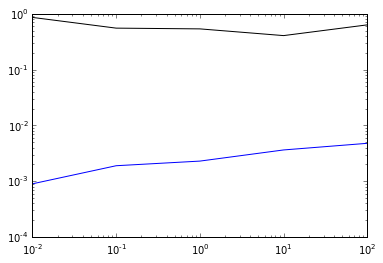

In [42]:
def combine2(a,b):
    return np.power(np.power(a,-2)+np.power(b,-2),-0.5)
plt.plot(allb_phi_med['beta'],allb_phi_med['combo_med_reg']/allb_phi_med['data'],'k-')
plt.plot(allb_phi_med['beta'],combine2(allb_phi_med['med_reg_par'],allb_phi_med['med_reg_perp']),'b-')
plt.xscale('log')
plt.yscale('log')

In [162]:
import scipy.io as io
matlab=io.loadmat('b0.01/cdf_pdf_to_python.mat')
print matlab['pred_model_cdf'][:,0]
print matlab['cv'][0]


[ 0.00362916  0.00658514  0.01149775  0.01932531  0.03128286  0.04879584
  0.07338702  0.10649261  0.14922185  0.20209697  0.26482764  0.33618039
  0.41399193  0.49534608  0.57689492  0.65526645  0.72747711  0.79126623
  0.84529118  0.88915884  0.92330931]
[ 0.13154268  0.13154268  0.13154268]


1.10039256385 1.10071504348


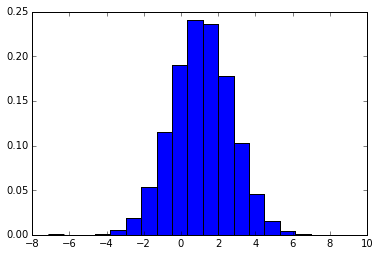

In [168]:
mu=1.1
sig=1.6
a=np.random.lognormal(mu,sig,10000000)
plt.hist(np.log(a),bins=20,normed=True)
print np.mean(np.log(a)),np.log(np.median(a))

# confirm height data hists


In [78]:
fin=open('b0.01/data_and_phis.pickle','r')
(data,phi_mean,phi_med)=pickle.load(fin)
fin.close()
print phi_mean.keys()

['mean_reg_perp', 'med_reg_par', 'linavg_mean_rms', 'logavg_lee14', 'mean_rms_perp', 'linavg_med_rms', 'logavg_mean_rms', 'med_rms_perp', 'linavg_med_reg', 'logavg_mean_reg', 'lee14_par', 'mean_reg_par', 'bh', 'linavg_lee14', 'cunning12', 'logavg_med_reg', 'lee14_perp', 'logavg_med_rms', 'data', 'med_reg_perp', 'linavg_mean_reg', 'mean_rms_par', 'w', 'turb', 'med_rms_par']


In [109]:


print ks_label(matlab['h1'][0][0],matlab['p1'][0][0])

p-value= 0.42, cannot reject at 20 level


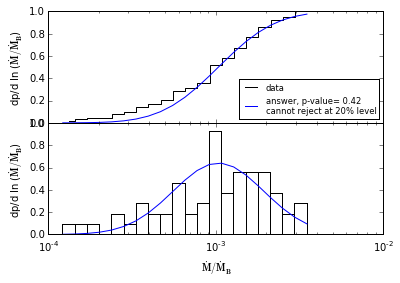

In [112]:
(pdf,bins,junk)=plt.hist(np.log(data),bins=20,normed=True)
(cdf,bins,junk)=plt.hist(np.log(data),bins=bins,normed=True,cumulative=True)
plt.close()

def ks_label(h,p):
    if h > 0: return 'p-value= %.2f\n reject at 20%% level' % p
    else: return 'p-value= %.2f\ncannot reject at 20%% level' % p

fig,axes=plt.subplots(2,1,sharex=True)
ax=axes.flatten()
plt.subplots_adjust( hspace=0 )

centers=np.exp((bins[:-1]+bins[1:])/2)
left=np.exp(bins[:-1])
right=np.exp(bins[1:])
# ax[0].bar(centers,cdf,width=right-left,align='center',fill=False,color='k',label='data')
ax[0].step(centers, cdf, where='mid',color='k',label='data')
label='answer, '+ks_label(matlab['h1'][0][0],matlab['p1'][0][0])
ax[0].plot(np.exp(bins),matlab['data_model_cdf'][0],'b-',label=label)
ax[1].bar(centers,pdf,width=right-left,align='center',fill=False,color='k',label='data')
ax[1].plot(np.exp(bins),matlab['data_model_pdf'][0],'b-',label='prediction')
#plt.xlim([1e-2,1e2])
#plt.ylim([0,0.5])
#     plt.yscale('log')

ax[1].set_xlabel(r'$\mathbf{\dot{M}/\dot{M}_{B}}$')
for i in range(2): 
    ax[i].set_xscale('log')
    ax[i].set_ylabel(r'dp/d ln ($\mathbf{\dot{M}/\dot{M}_{B}}$)')
ax[0].legend(loc=4,fontsize='small')
# plt.savefig(os.path.join(save_path,'dist_test.png'))
# plt.close()

In [31]:
phi_mean.keys()

['mean_reg_perp',
 'med_reg_par',
 'med_reg_perp',
 'turb_med_reg',
 'med_rms_perp',
 'mean_rms_par',
 'bh',
 'combo_mean_reg',
 'mean_reg_par',
 'mean_rms_perp',
 'turb_mean_reg',
 'turb_mean_rms',
 'combo_med_rms',
 'w',
 'turb_med_rms',
 'combo_mean_rms',
 'data',
 'turb',
 'med_rms_par',
 'combo_med_reg']

(0.0005, 0.02)

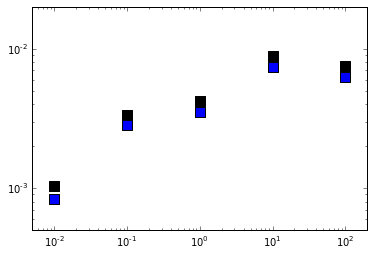

In [103]:
mean_orig=np.array([0.0013,0.0056,0.0079,0.0139,.0118])
med_orig=np.array([0.0010,0.0034,0.0042,0.0088,0.0075])
plt.scatter(beta,data_med,s=100,c='k',marker='s')
plt.scatter(beta,med_orig/1.2,s=100,c='b',marker='s')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-2/2,1e2*2)
plt.ylim(5e-4,2e-2)

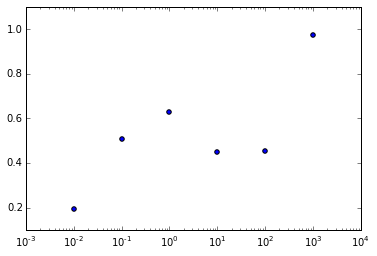

In [95]:
mean_inf,med_inf= 0.9,0.34
plt.scatter(beta,np.log(data_mean/data_med))
plt.scatter(1e3,np.log(mean_inf/med_inf))
plt.xscale('log')

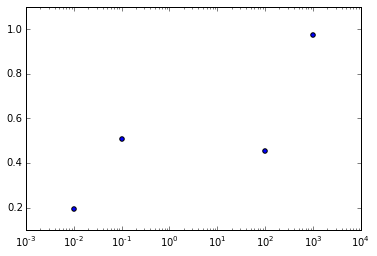

In [97]:
mean_inf,med_inf= 0.9,0.34
plt.scatter(beta[:2],np.log(data_mean[:2]/data_med[:2]))
plt.scatter(beta[4],np.log(data_mean[4]/data_med[4]))
plt.scatter(1e3,np.log(mean_inf/med_inf))
plt.xscale('log')

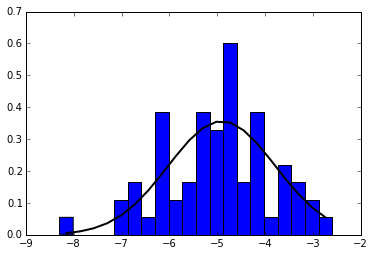

In [7]:
fin=open('b100/data_and_phis.pickle','r')
(data,phi_mean,phi_med)=pickle.load(fin)
fin.close()
(pdf,bins,junk)=plt.hist(np.log(data),bins=20,normed=True)

def gauss(x,mu,sig):
    return (2*np.pi*sig**2)**-0.5*np.exp(-(x-mu)**2/2/sig**2)

x=(bins[1:]+bins[:-1])/2
opt,cov= curve_fit(gauss,x,pdf)
plt.plot(x,gauss(x,opt[0],opt[1]),'k-',lw=2)